In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('decision_tree_practice.csv')
print("rows,cols:", df.shape)
print(df.head())

rows,cols: (10, 5)
   Age  Income Student Credit_Rating Buys_Computer
0   22     Low     Yes          Fair            No
1   25     Low      No     Excellent            No
2   47    High      No          Fair           Yes
3   52    High      No          Fair           Yes
4   46  Medium     Yes     Excellent           Yes


In [6]:
y = df['Buys_Computer'].map({'No': 0, 'Yes': 1})

In [8]:
X = df.drop(columns=['Buys_Computer'])
X = pd.get_dummies(X, drop_first=True)
print("Feature columns:", list(X.columns))

Feature columns: ['Age', 'Income_Low', 'Income_Medium', 'Student_Yes', 'Credit_Rating_Fair']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

In [12]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Confusion matrix:
 [[0 1]
 [0 2]]


C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


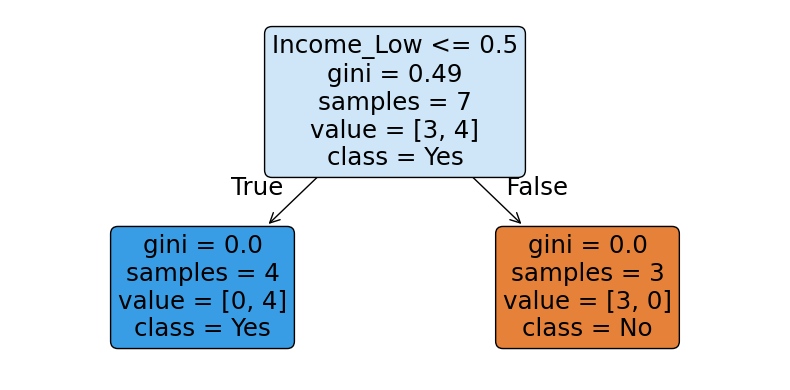

In [18]:
plt.figure(figsize=(8,4))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No','Yes'],
          filled=True,
          rounded=True)
plt.tight_layout()
plt.show()

In [20]:
print(export_text(clf, feature_names=list(X.columns)))

|--- Income_Low <= 0.50
|   |--- class: 1
|--- Income_Low >  0.50
|   |--- class: 0



In [22]:
param_grid = {
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 3, 4]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best = grid.best_estimator_
print("Test report for best estimator:")
print(classification_report(y_test, best.predict(X_test)))

Best params: {'max_depth': None, 'min_samples_split': 2}
Test report for best estimator:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
